  **1.- Preparando un Run**

---

$1$. *Binarias Eclipsantes*

Se denomina binarias eclipsantes a un sistema de estrellas ligadas gravitacionalmente que se orbitan en torno a su centro de masa de manera estable. Su plano de giro está en la línea de visión desde la Tierra, por lo que se puede ver su mutua eclipsación.
Los sistemas binarios son de mucha importancia en Astrofísica ya que en ellos se puede comprobar la teoría de estructura y evolución estelar.
Los sistemas binarios son los únicos conjuntos donde se puede calcular con precisión la masa de sus componentes aplicando las leyes de la mecánica al análisis orbital del sistema a partir de las leyes de Kepler. También como es un sistema eclipsante, al igual que en el tránsito de un planeta, se pueden obtener la relacion de los radios. Todo esto nos permite entender más sobre como se forman y evolucionan estos sistemas y sus estrellas.

$2$. *Espectrógrafo Echelle*

Un espectrógrafo echelle es un tipo de espectrografo de alta resolución (tipicamente $R = 18.000$). Estos espectrógrafos utilizan ranuras de difracción muy pequeñas que hacen que la luz se separa en sus componentes y ademas se ordene en distintas líneas, tal como cuando alguien escribe en un cuaderno.
Los espectrográfos echelle son importantes para estudiar estrellas binarias debido a que con su alta resolución se pueden medir velocidades muy bajas de estrellas que se orbitan, no pudiendo medirse con un espectrografo 'normal'.

$3$. *Candidatos a binarias eclipsantes*

Para crear modelos de curvas de luz
- Primero se ajusta una funcion seno con minimos cuadrados
- Luego con un periodograma se ajusta el periodo de la función determinada

Los candidatos a binarias eclipsantes se presentan a continuación y se muestra si son casos confirmados.

|    ID     |     Confirmado       | Ascensión Recta (°) | Declinación (°) |
|:---------:|:--------------------:|:-------------------:|:---------------:|
| HD23765   |         No           |       57.1205       |     21.7975     |
| HD287039  |         No           |       71.5819       |     12.7448     |
| HD89849   |         No           |       155.541       |     6.21829     |
| BD-073648 |         No           |       203.727       |    -8.44247     |
| HD75767   | Si (espectroscópica) |       133.068       |     8.06293     |
| HD198044  |         No           |       312.091       |    -22.7407     |
| HD205403  |         No           |       323.766       |     -3.7349     |
| HD213597  |         Si           |       338.136       |     1.58245     |
| HD222891  |         No           |       356.162       |    -8.84879     |
*Tabla 1. Binarias eclipsantes confirmadas y candidatos a binarias eclipsantes.*

$4$. *Visibilidad de candidatos a binarias eclipsantes*

Para determinar la visibilidad de binarias eclipsantes se determina la posición del sol y las regiones visibles del cielo que esten a mas de 30° sobre el horizonte en el observatorio Santa Martina.

In [1]:
import ephem

sant = ephem.city('Santiago')
print("Latitud de Santiago:", sant.lat)

grados = -33 - 16/60 - 9/3600
print("Latitud Observatorio Santa Martina:", grados, "°")

vnorte = grados + 60
if vnorte > 90:
    vnorte = 90
vsur = grados - 60
if vsur < -90:
    vsur = -90
print("Objetos visibles entre:", vnorte, "° y", vsur, "°")

Latitud de Santiago: -33:25:31.3
Latitud Observatorio Santa Martina: -33.26916666666666 °
Objetos visibles entre: 26.730833333333337 ° y -90 °


Como la latitud del observatorío Santa Martina es 33,2692° sur, en principio solo son visibles objetos que tienen declinaciones entre 26,7308° y -90° (teniendo en cuenta que solo se pueden observar objetos que están a más de 30° sobre el horizonte). Esto no elimina candidatos para la observación.

In [2]:
gatech = ephem.Observer()
gatech.lon = ephem.degrees('-70.5344')
gatech.lat = ephem.degrees('-33.2692')
gatech.elevation = 1450
gatech.date = '2016/11/14 22:00:00'
sun = ephem.Sun(gatech)
rasun = sun.ra
decsun = sun.dec
print("14 de noviembre de 2016 - sol: AR:", rasun, ", DEC:", decsun)

14 de noviembre de 2016 - sol: AR: 15:22:16.14 , DEC: -18:30:34.1


Según esto, objetos con ascensión recta entre 13:22:16.14 (200.567°) y 18:22:16.14 (260.567°) no serán visibles, ya que sus ascensiones rectas serán muy cercanas a las del sol. Este criterio de exclusión es solo válido para fuentes que no se alejen mucho del ecuador.

|     ID    | Visible | Ascensión Recta (°) | Declinación (°) |
|:---------:|:-------:|:-------------------:|:---------------:|
| HD23765   |   Si    |       57.1205       |     21.7975     |
| HD287039  |   Si    |       71.5819       |     12.7448     |
| HD89849   |   Si    |       155.541       |     6.21829     |
| BD-073648 |   Si    |       203.727       |    -8.44247     |
| HD198044  |   Si    |       312.091       |    -22.7407     |
| HD205403  |   Si    |       323.766       |     -3.7349     |
| HD222891  |   Si    |       356.162       |    -8.84879     |
*Tabla 2. Visibilidad de candidatos a binarias eclipsantes (primera aproximación).*

**Importante:** Este método de determinar visibilidad es rústico y es solo para descartar fuentes. Para determinar completamente si es visible se procede más abajo con un método más preciso.

In [3]:
ID = ['HD23765', 'HD287039', 'HD89849', 'BD-073648', 'HD198044', 'HD205403', 'HD222891']
RA = [57.1205, 71.5819, 155.541, 203.727, 312.091, 323.766, 356.162]
DEC = [21.7975, 12.7448, 6.21829, -8.44247, -22.7407, -3.7349, -8.84879]

obs = ephem.Observer()
obs.long = ephem.degrees('-70.5344')
obs.lat = ephem.degrees('-33.2692')
obs.elevation = 1450
star = ephem.FixedBody()
for j in [0, 1, 2, 3, 4, 5, 6]:
    obs.date = '2016/10/31 19:50:00'
    star._ra = RA[j]
    star._dec = DEC[j]
    print(ID[j])
    for k in range(10):
        obs.date += ephem.hour * 24 * 2
        for i in range(21):
            obs.date += ephem.minute * 10
            star.compute(obs)
            h = str(star.alt)
            if h[0] != '-':
                if h[1] != ':':
                    if int(h[:2]) > 30:
                        print('Hora:', obs.date, 'Altura:', star.alt)
        obs.date -= ephem.minute * 210
    print('-')

HD23765
-
HD287039
-
HD89849
Hora: 2016/11/2 20:00:00 Altura: 60:27:03.4
Hora: 2016/11/2 20:10:00 Altura: 60:21:50.0
Hora: 2016/11/2 20:20:00 Altura: 60:05:36.0
Hora: 2016/11/2 20:30:00 Altura: 59:38:39.2
Hora: 2016/11/2 20:40:00 Altura: 59:01:27.9
Hora: 2016/11/2 20:50:00 Altura: 58:14:38.6
Hora: 2016/11/2 21:00:00 Altura: 57:18:53.3
Hora: 2016/11/2 21:10:00 Altura: 56:14:57.0
Hora: 2016/11/2 21:20:00 Altura: 55:03:35.3
Hora: 2016/11/2 21:30:00 Altura: 53:45:33.2
Hora: 2016/11/2 21:40:00 Altura: 52:21:33.0
Hora: 2016/11/2 21:50:00 Altura: 50:52:14.5
Hora: 2016/11/2 22:00:00 Altura: 49:18:13.7
Hora: 2016/11/2 22:10:00 Altura: 47:40:03.2
Hora: 2016/11/2 22:20:00 Altura: 45:58:12.4
Hora: 2016/11/2 22:30:00 Altura: 44:13:07.2
Hora: 2016/11/2 22:40:00 Altura: 42:25:10.6
Hora: 2016/11/2 22:50:00 Altura: 40:34:43.1
Hora: 2016/11/2 23:00:00 Altura: 38:42:02.7
Hora: 2016/11/2 23:10:00 Altura: 36:47:25.4
Hora: 2016/11/2 23:20:00 Altura: 34:51:05.2
Hora: 2016/11/4 20:00:00 Altura: 60:23:53.0
Hor

Según esto, solo HD89849 y BD-073648 son visibles por las próximas 3 semanas.
Ahora Hacemos gráficos de visibilidad

Populating the interactive namespace from numpy and matplotlib


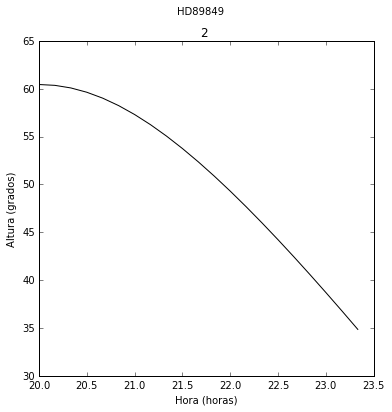

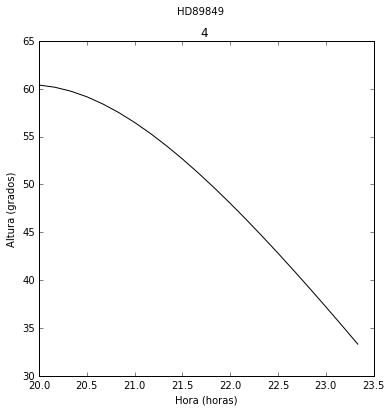

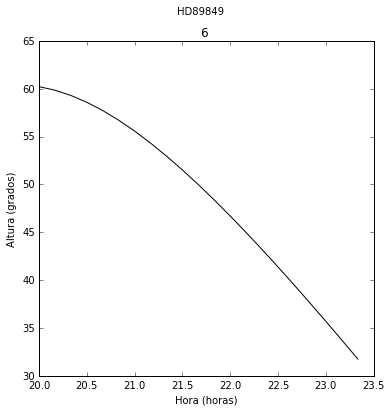

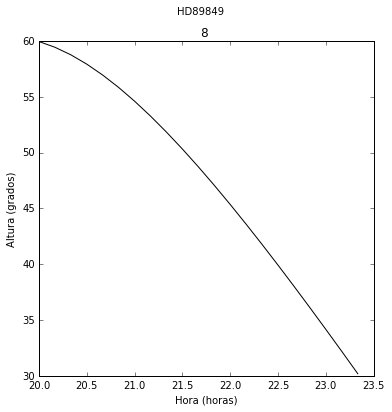

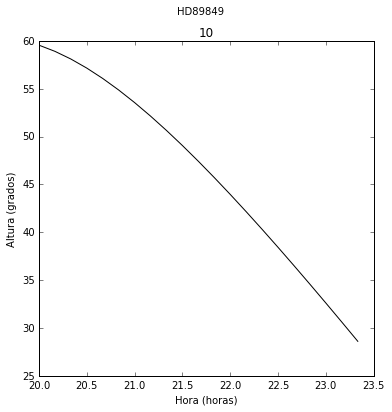

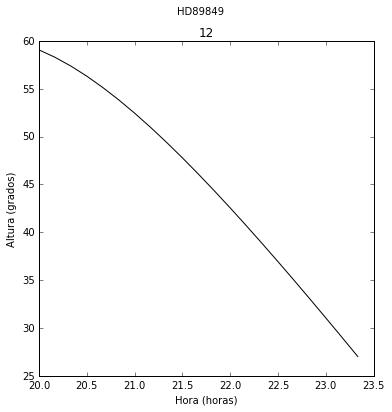

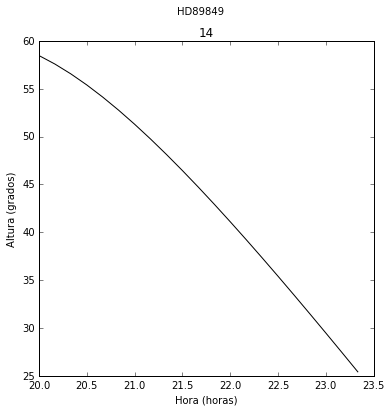

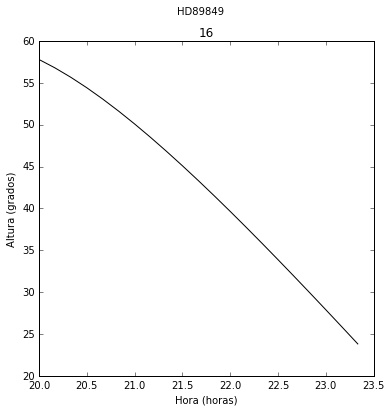

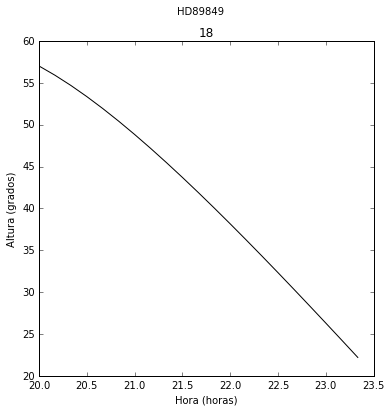

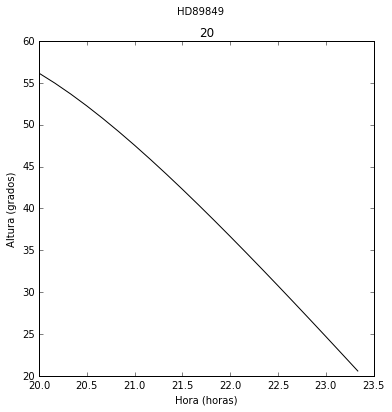

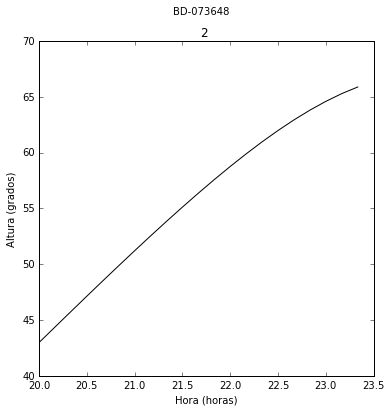

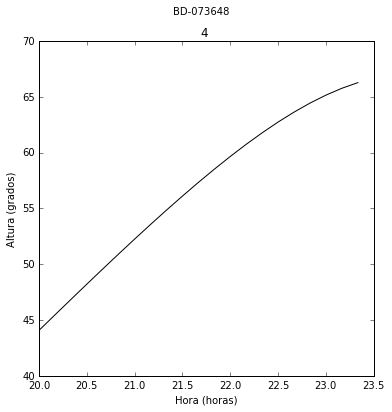

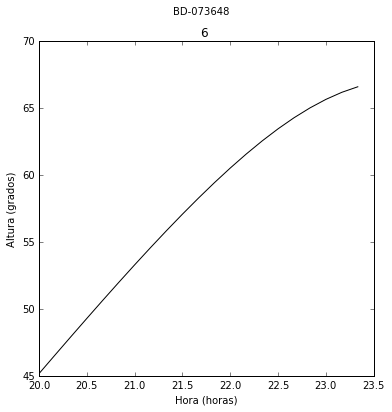

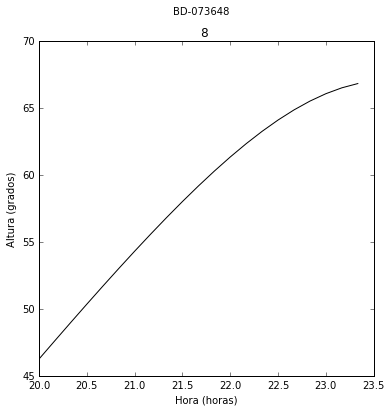

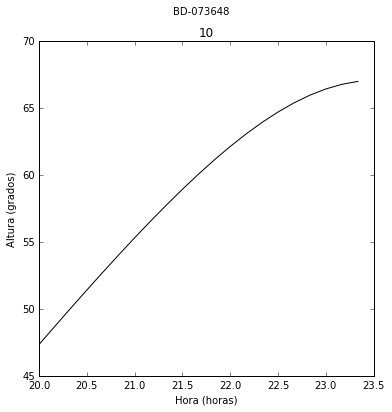

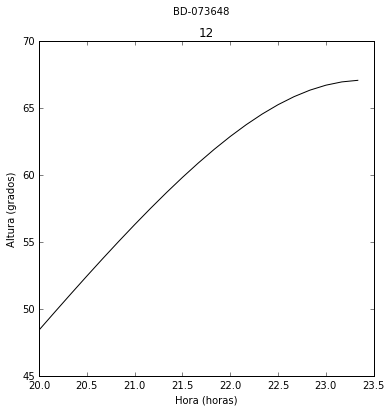

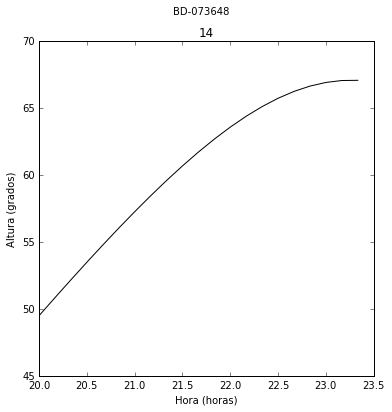

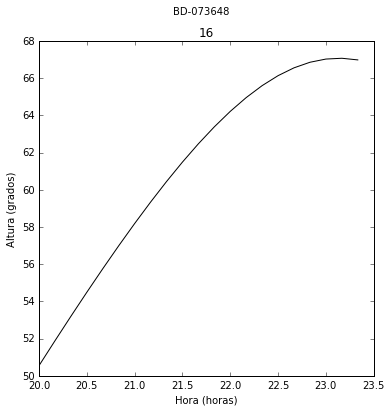

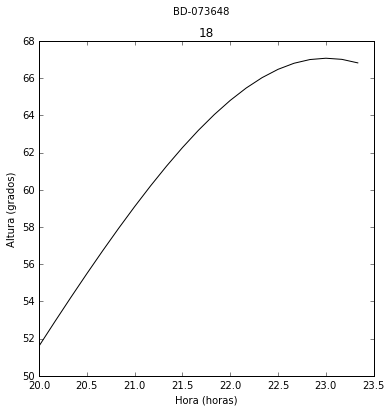

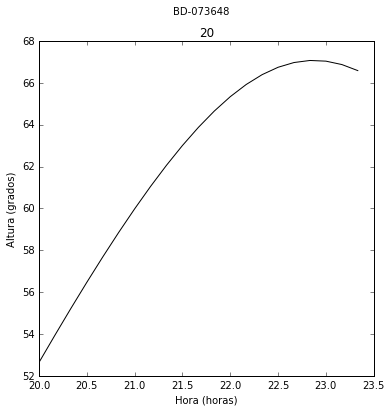

In [4]:
import matplotlib.pyplot as plt
%pylab inline

ID = ['HD89849', 'BD-073648']
RA = [155.541, 203.727]
DEC = [6.21829, -8.44247]

def cortarf(f):
    j = 0
    for i in f:
        if i == ' ':
            f1 = f[j+1:]
        j = j + 1
    hora = float(f1[:2]) + float(f1[3:5])/60 + float(f1[6:])/3600
    return hora

def cortarh(h):
    altura = float(h[:2]) + float(h[3:5])/60 + float(h[6:])/3600
    return altura

def cortard(f):
    dia = f[8:10]
    return dia

for j in [0, 1]: # for que recorre las fuentes
    obs.date = '2016/10/31 19:50:00'
    star._ra = RA[j]
    star._dec = DEC[j]
    for k in range(10): # for que recorre los dias
        horas = []
        alturas = []
        obs.date += ephem.hour * 24 * 2
        for i in range(21): # for que recorre las horas
            obs.date += ephem.minute * 10
            star.compute(obs)
            f = str(obs.date)
            h = str(star.alt)
            horas.append(cortarf(f))
            alturas.append(cortarh(h))
        obs.date -= ephem.minute * 210
        plt.subplots(figsize=(6,6))
        plt.plot(horas,alturas,'k')
        plt.suptitle(ID[j])
        plt.title(cortard(f))
        plt.xlabel("Hora (horas)")
        plt.ylabel("Altura (grados)")
        plt.show()

$5$. *Fechas de cuadratura de los candidatos a binarias eclipsantes*

Las fechas de medio eclipse se presenta en la *Tabla 1*.

|     ID    | Tiempo mitad eclipse (DJM) | Periodo (dias) |
|:---------:|:--------------------------:|:--------------:|
| HD89849   |       54305.226101         |     3.0781     |
| BD-073648 |       54353.170536         |     2.5265     |
*Tabla 3. Candidatos a binarias eclipsantes visibles. Fechas de tránsito y periodo*

In [5]:
TME = [54305.226101, 54353.170536] #DJM de las fuentes candidatas visibles
P = [3.0781, 2.5265] # periodos
ID = ['HD89849', 'BD-073648']
difDJ = []
neclip = []
uno = []

for i in [0, 1]:
    difDJ.append(57693 - TME[i]) # diferencia entre 1 de noviembre de 2016 y DJM del medio eclipse de la tabla 2

for i in [0, 1]:
    neclip.append(difDJ[i]//P[i]) # numero (parte entera) de veces que ha pasado por medio eclipse hasta 1 de noviembre

for i in [0, 1]:
    uno.append(TME[i] + neclip[i]*P[i]) # DJ del medio eclipse el 1 de noviembre (o fecha cercana)

for i in [0, 1]:
    print('Fechas cuadraturas', ID[i], ':')
    for n in range(1, 18):
        hoy = uno[i] + n*P[i]/2 + P[i]/4 # se suma P/4 para pasar de las fechas de medio eclipse a las de cuadratura
        print('DJ:', hoy)
    print('-')

Fechas cuadraturas HD89849 :
DJ: 57693.444676
DJ: 57694.983726
DJ: 57696.522776
DJ: 57698.061826
DJ: 57699.600876
DJ: 57701.139925999996
DJ: 57702.678976
DJ: 57704.218026
DJ: 57705.757076
DJ: 57707.296126
DJ: 57708.835176
DJ: 57710.374226
DJ: 57711.913276
DJ: 57713.452326
DJ: 57714.991376
DJ: 57716.530426
DJ: 57718.069476
-
Fechas cuadraturas BD-073648 :
DJ: 57692.57191100001
DJ: 57693.835161
DJ: 57695.098411000006
DJ: 57696.361661
DJ: 57697.624911000006
DJ: 57698.888161
DJ: 57700.151411000006
DJ: 57701.414661
DJ: 57702.677911000006
DJ: 57703.941161
DJ: 57705.204411000006
DJ: 57706.467661
DJ: 57707.730911000006
DJ: 57708.994161
DJ: 57710.257411000006
DJ: 57711.520661
DJ: 57712.783911000006
-


Las fechas y horas de las cuadraturas por las próximas 3 semanas para cada fuente visibles se presentan a continuación:

| N° |      HD89849      |     BD-073648     |
|:--:|:-----------------:|:-----------------:|
| 1  |   01/11 - 10:40   | **01/11 - 20:02** |
| 2  | **02/11 - 23:36** |   03/11 - 02:21   |
| 3  |   04/11 - 12:32   |   04/11 - 08:40   |
| 4  |   06/11 - 01:29   |   05/11 - 14:59   |
| 5  |   07/11 - 14:25   | **06/11 - 21:18** |
| 6  |   09/11 - 03:21   |   08/11 - 03:38   |
| 7  |   10/11 - 16:16   |   09/11 - 09:57   |
| 8  |   12/11 - 05:13   |   10/11 - 16:16   |
| 9  |   13/11 - 18:10   | **11/11 - 22:35** |
| 10 |   15/11 - 07:06   |   13/11 - 04:54   |
| 11 | **16/11 - 20:02** |   14/11 - 11:13   |
| 12 |   18/11 - 08:58   |   15/11 - 17:32   |
| 13 | **19/11 - 21:55** | **16/11 - 23:51** |
| 14 |   21/11 - 10:51   |   18/11 - 06:10   |
| 15 |         -         |   19/11 - 12:29   |
| 16 |         -         |   20/11 - 18:48   |
*Tabla 4. Fechas y horas de cuadratura para los candidatos a binarias eclipsantes visibles*

Ahora se exponen los gráficos

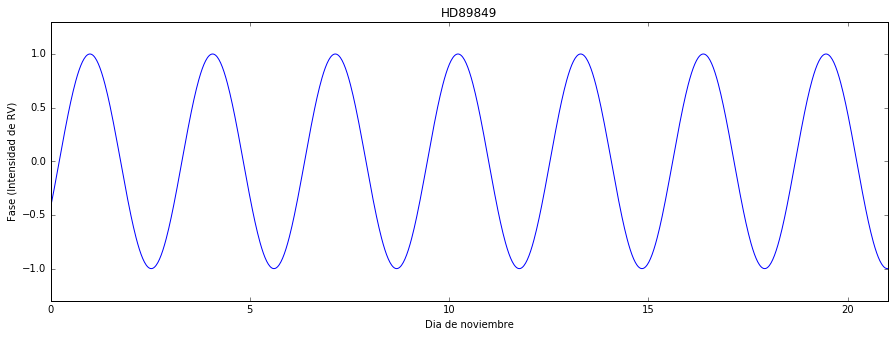

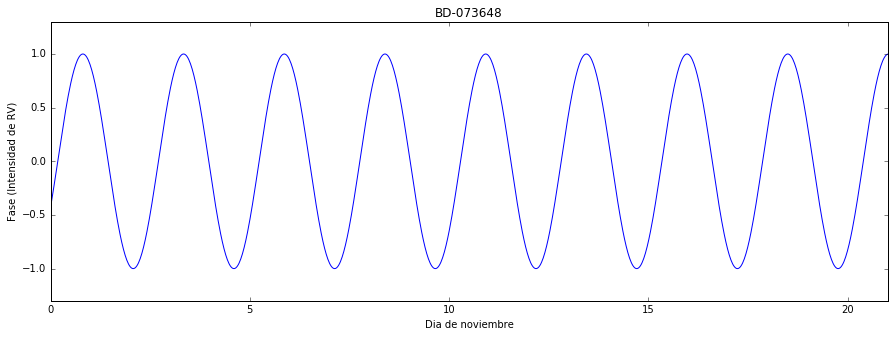

In [6]:
import numpy as np
import scipy as sp

desfase = [10/24 + 40/(24*60), 20/24 + 2/(24*60)] # desfase debido a que la cuadratura no es a las 00:00 el 1 de nov

for i in [0, 1]:
    x = sp.linspace(0, 21, 1000)
    y = sp.sin(2*np.pi*x/P[i] - desfase[0])
    plt.figure(figsize=(15,5))
    plt.plot(x,y)
    plt.title(ID[i])
    plt.xlim(0,21)
    plt.ylim(-1.3,1.3)
    plt.xlabel("Dia de noviembre")
    plt.ylabel("Fase (Intensidad de RV)")
    plt.show()

Aquí se asumió que la excentricidad es 0, ya que se asume que el tiempo que pasa entre una cuadratura, un medio eclipse y la siguiente cuadratura es el mismo.

$6$. *Variación de RV en función de la masa de la estrella*

De la función de masas de un sistema binario tenemos

$\frac{a³}{T²}=\frac{m³}{(m+M)²}$

Pero si asumimos excentricidad 0, tenemos un movimiento circular uniforme, donde su velocidad lineal es:

$r = \frac{Tv}{2\pi}$

Fuentes:
> *https://ui.adsabs.harvard.edu/#abs/2012MNRAS.427.2298W/abstract*

> *https://www.observatorioguirguillano.org/index.php/es/.../doc.../191-sistemas-binarios.html*

> *https://es.wikipedia.org/wiki/Red_de_difracci%C3%B3n*

> *http://simbad.u-strasbg.fr/simbad/*

> *http://www.uv.es/~regalado/mira/mira3/302.html*

> *http://tycho.usno.navy.mil/mjd.html*

> *http://www.ugr.es/~eaznar/conversorFecha.htm*

> *http://www.webs.ulpgc.es/astrogeo/anexo_astro0506.pdf*

> *http://rhodesmill.org/pyephem/tutorial.html#computations-for-particular-observers*